<h1 style="font-size: 50px; color: #0059b3 ;text-align: center;
"> Predicting Ethereum Price  </h1>

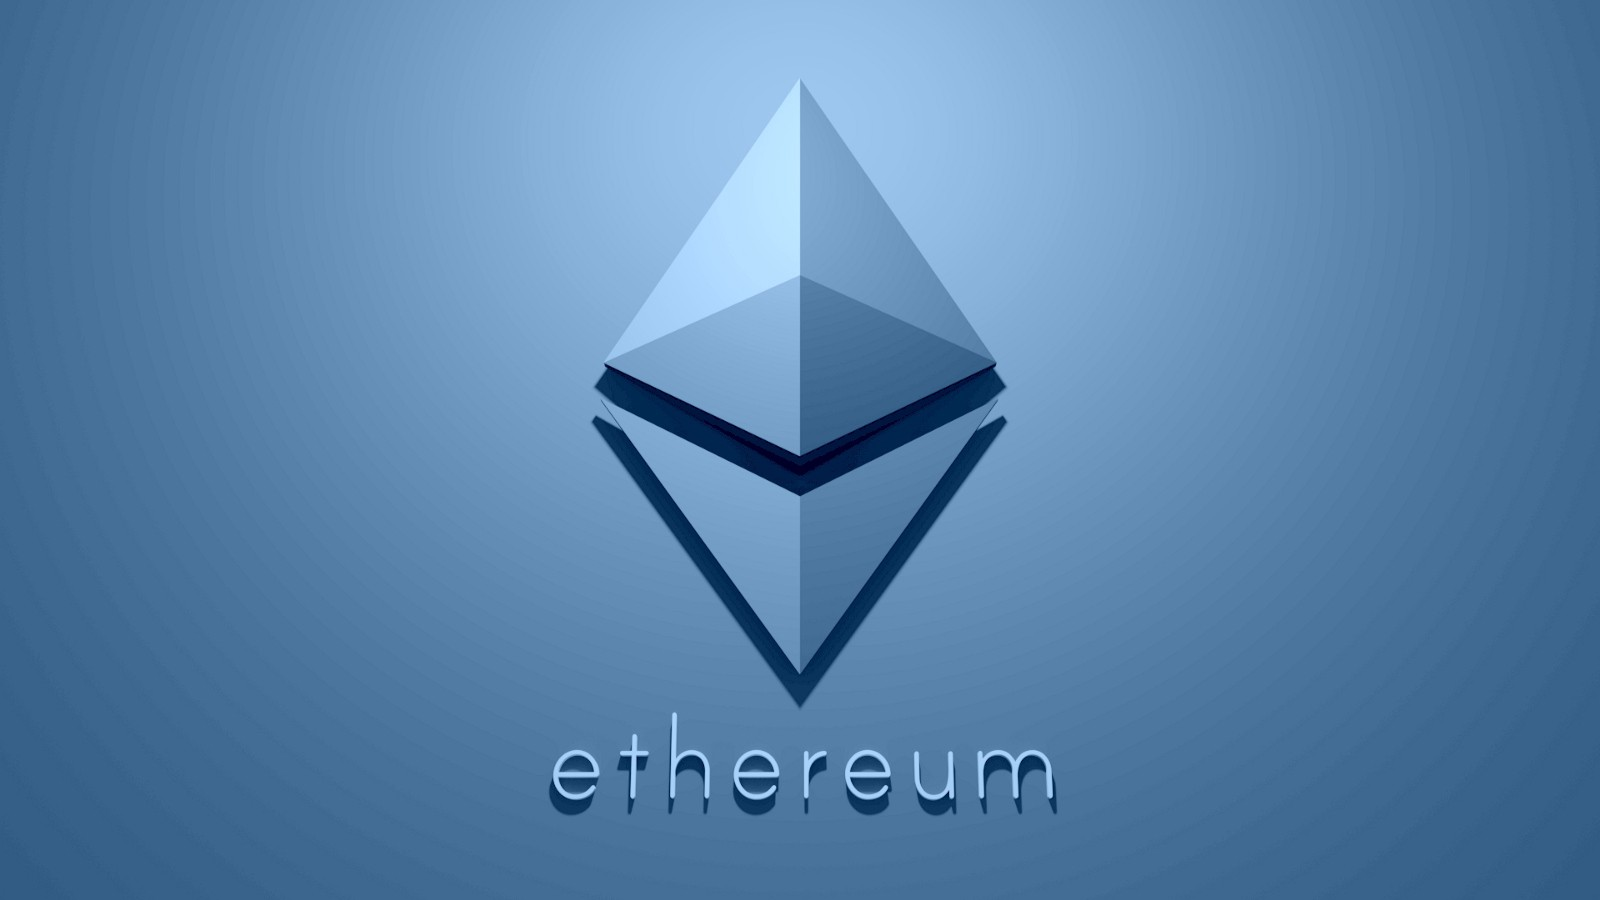

#### Ethereum is a blockchain-based software platform that can be used for sending and receiving value globally with its native cryptocurrency, ether, without any third-party interference. But it can also do much more than that.

#### First proposed in 2013 by Russian-Canadian computer programmer Vitalik Buterin, Ethereum was designed to expand the utility of cryptocurrencies by allowing developers to create their own special applications. Unlike traditional apps, these Ethereum-based applications, called “decentralized applications,” or dapps, are self-executing thanks to the use of smart contracts.

##  Import libraries and packages

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor 
from sklearn.svm import LinearSVR


##  Reading Dataset

In [2]:
data=pd.read_csv('./ethereum_price.csv')
data

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 08, 2023","1,553.49","1,561.79","1,569.70","1,548.98",498.57K,-0.53%
1,"Mar 07, 2023","1,561.78","1,565.84","1,580.95","1,536.31",460.10K,-0.26%
2,"Mar 06, 2023","1,565.84","1,564.36","1,581.13","1,555.43",322.16K,0.09%
3,"Mar 05, 2023","1,564.37","1,566.73","1,587.95","1,556.84",313.01K,-0.15%
4,"Mar 04, 2023","1,566.73","1,569.45","1,577.02","1,550.10",247.02K,-0.14%
...,...,...,...,...,...,...,...
2550,"Mar 14, 2016",12.50,15.07,15.07,11.40,92.18K,-17.05%
2551,"Mar 13, 2016",15.07,12.92,15.07,12.92,1.30K,16.64%
2552,"Mar 12, 2016",12.92,11.95,13.45,11.95,0.83K,8.12%
2553,"Mar 11, 2016",11.95,11.75,11.95,11.75,0.18K,1.70%


### Let’s have a look at the insights of the columns to understand the data type of all the columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2555 non-null   object
 1   Price     2555 non-null   object
 2   Open      2555 non-null   object
 3   High      2555 non-null   object
 4   Low       2555 non-null   object
 5   Vol.      2555 non-null   object
 6   Change %  2555 non-null   object
dtypes: object(7)
memory usage: 139.9+ KB


### Then find out How many Raws and columns that the dataset contains

In [4]:
data.shape

(2555, 7)

### Finding the statistical meashures

In [33]:
data.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000
mean,1277.000000,1203.737769,1204.716243,1202.199609,1207.279843,895.654012,601.147945
std,737.709292,706.122283,704.011980,703.362338,704.924431,631.428740,387.382567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,638.500000,575.500000,579.500000,576.500000,579.500000,298.500000,255.000000
50%,1277.000000,1187.000000,1192.000000,1189.000000,1195.000000,871.000000,646.000000
75%,1915.500000,1816.500000,1817.500000,1810.500000,1820.500000,1462.500000,933.000000
max,2554.000000,2441.000000,2433.000000,2435.000000,2427.000000,2015.000000,1332.000000


### Let’s have a look at whether this dataset contains any null values or not

In [6]:
data.isnull().mean()*100

Date        0.0
Price       0.0
Open        0.0
High        0.0
Low         0.0
Vol.        0.0
Change %    0.0
dtype: float64

### Label Encoder 
### converting object data to numeric

In [34]:
le =LabelEncoder()
data["Date"]=le.fit_transform(data["Date"])
data["Price"]=le.fit_transform(data["Price"])
data["Open"]=le.fit_transform(data["Open"])
data["High"]=le.fit_transform(data["High"])
data["Low"]=le.fit_transform(data["Low"])
data["Vol."]=le.fit_transform(data["Vol."])
data["Change %"]=le.fit_transform(data["Change %"])

<h1 style="font-size: 30px; color: #800080 ;text-align: center;
"> Exploratory Data Analysis </h1>

## Univariate analysis

### Analyze the data by Plotiing the Histplot

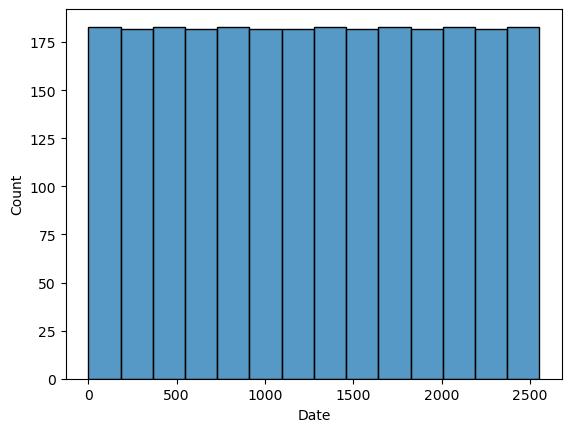

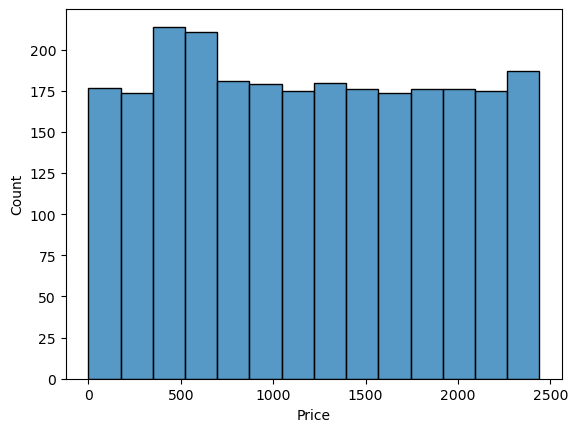

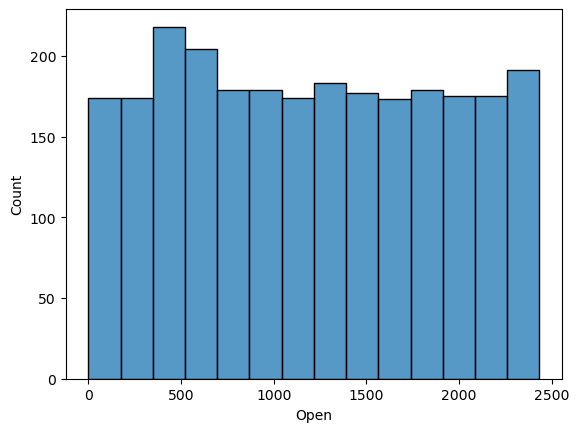

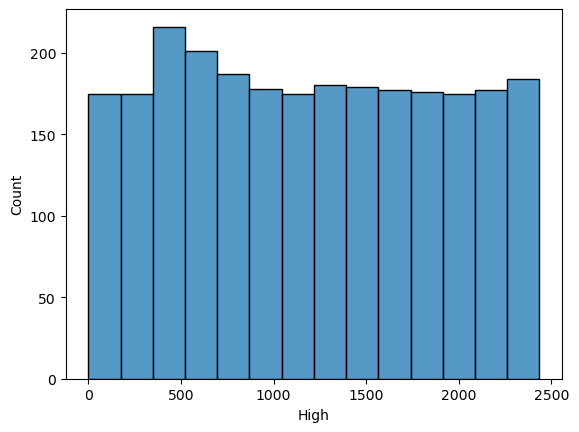

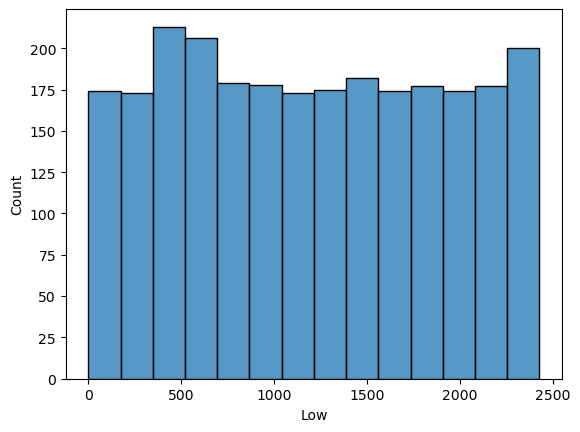

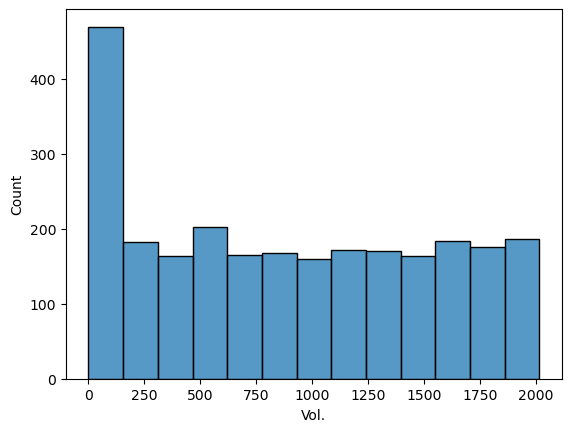

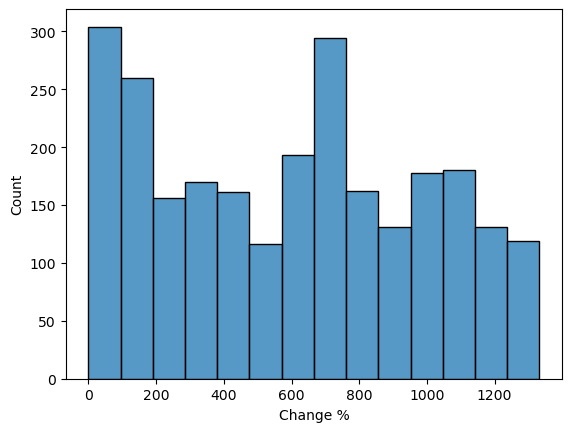

In [9]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.histplot( x =data[i])
        plt.show()

### Analyze the data by plottinig kde plot

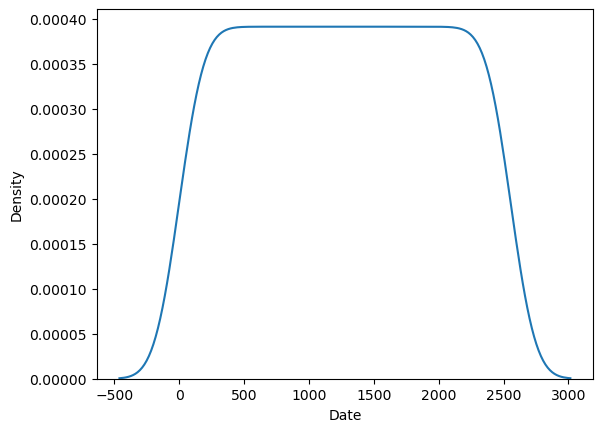

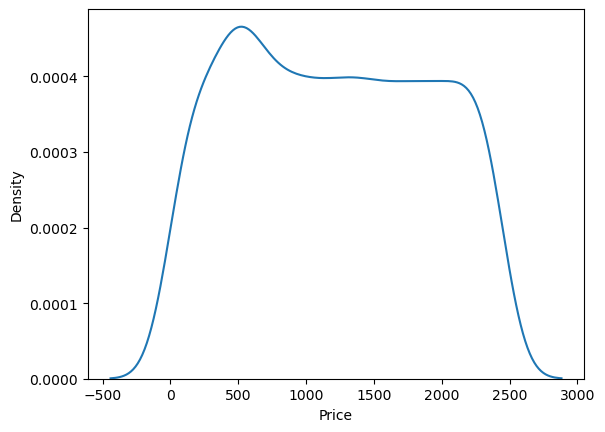

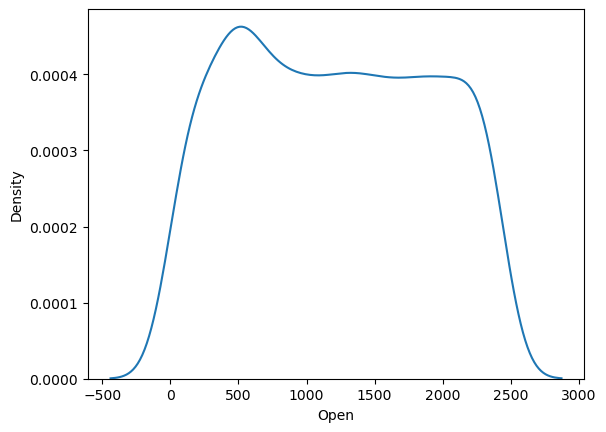

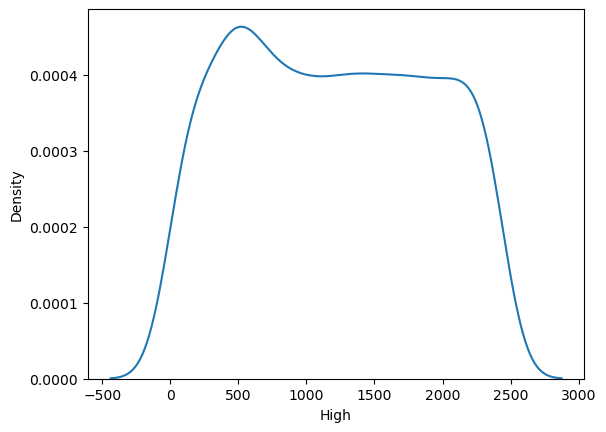

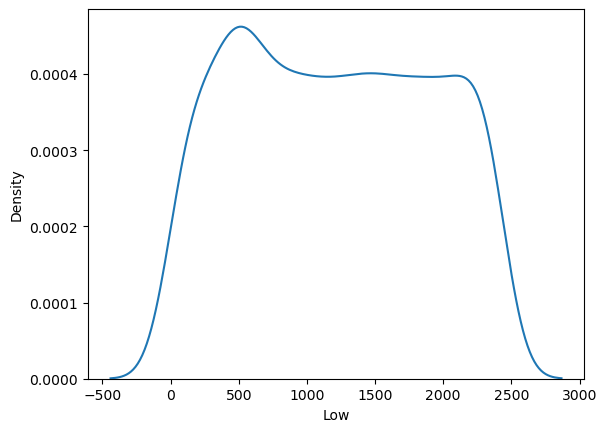

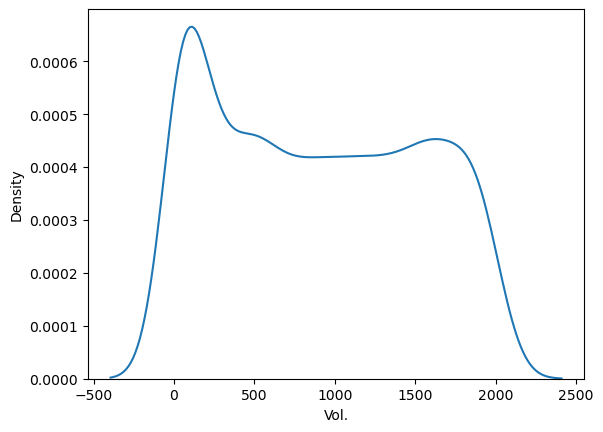

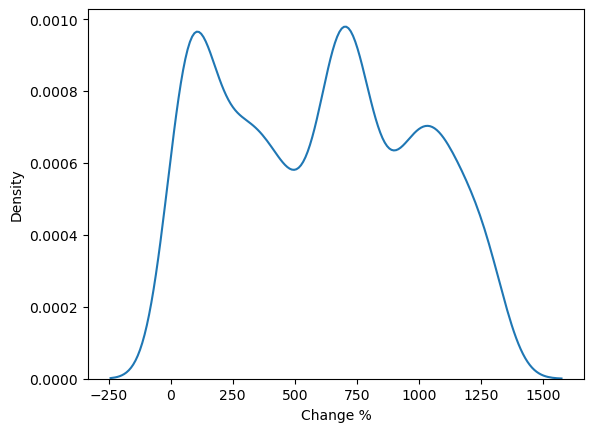

In [10]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.kdeplot( x =data[i])
        plt.show()

## MULTI VARIATE ANALYSIS

### Line plot

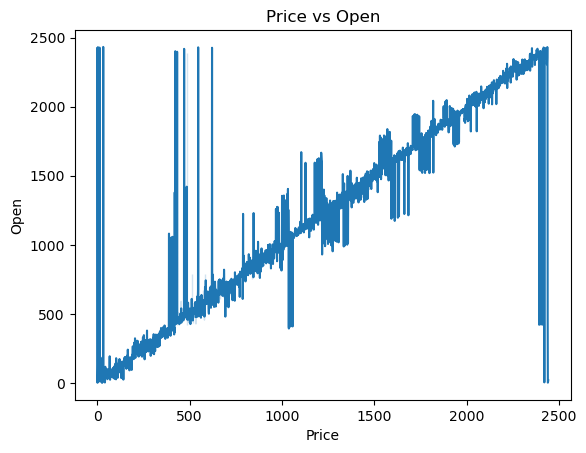

In [11]:
sns.lineplot('Price','Open', data=data)
plt.title("Price vs Open")
plt.show()

### Pair plot

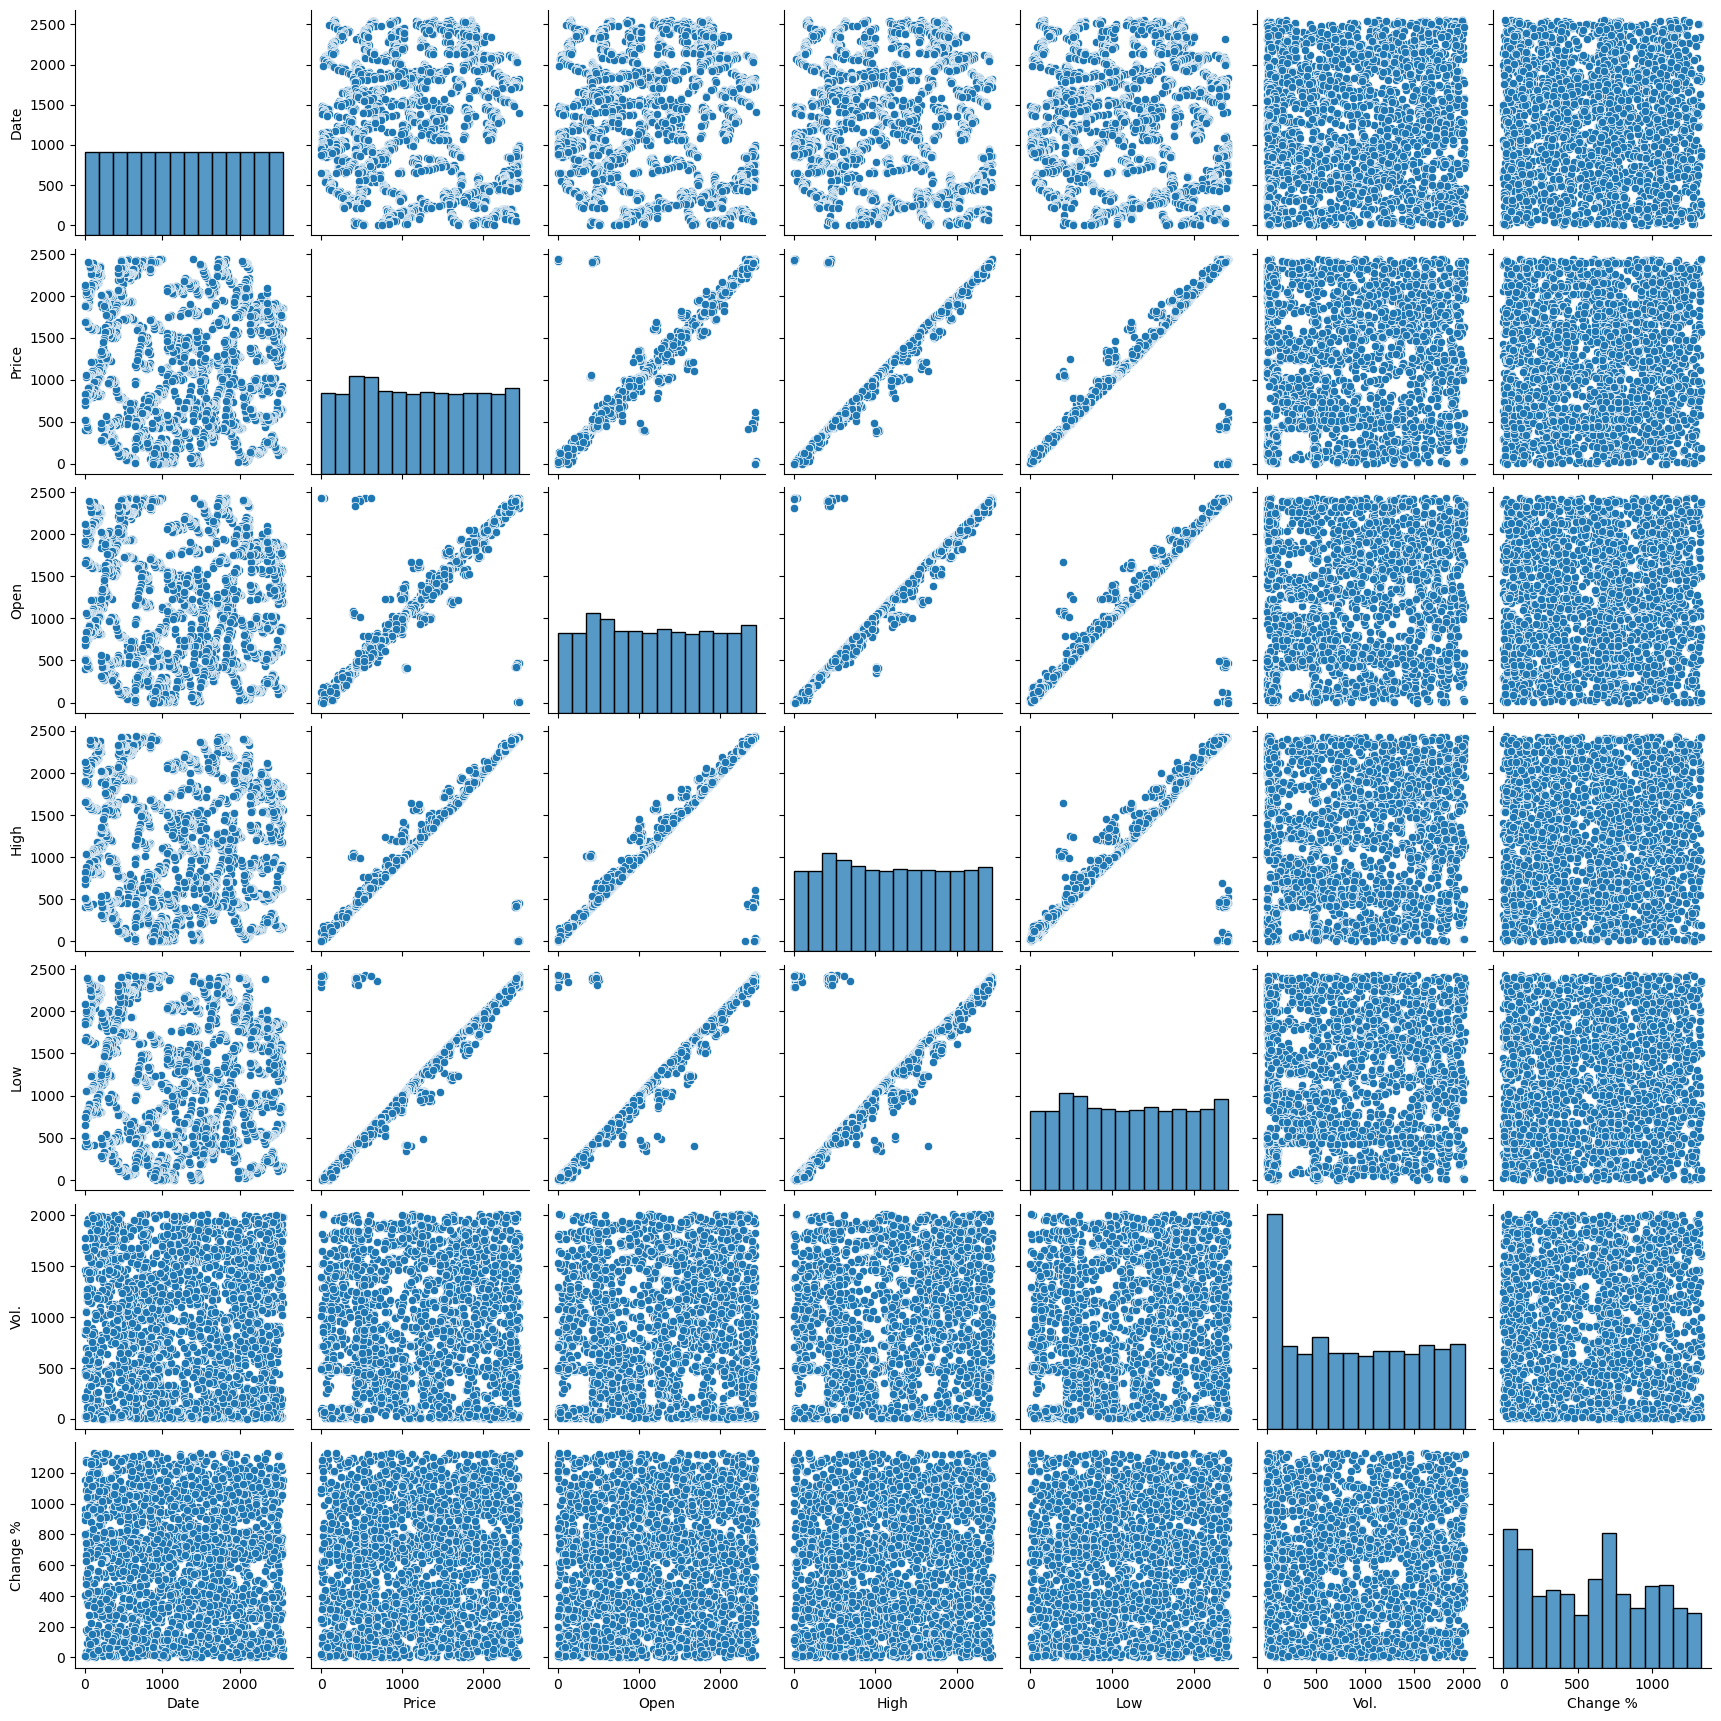

In [12]:
sns.pairplot(data=data)
plt.show()

### Find out the outliers present in the data set using Boxplot

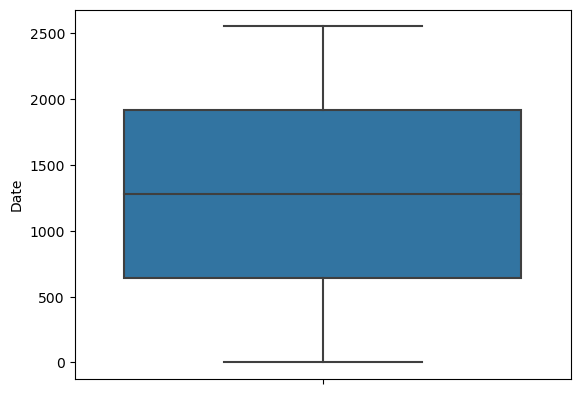

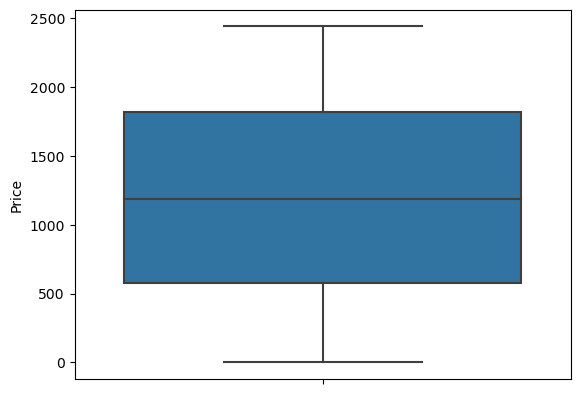

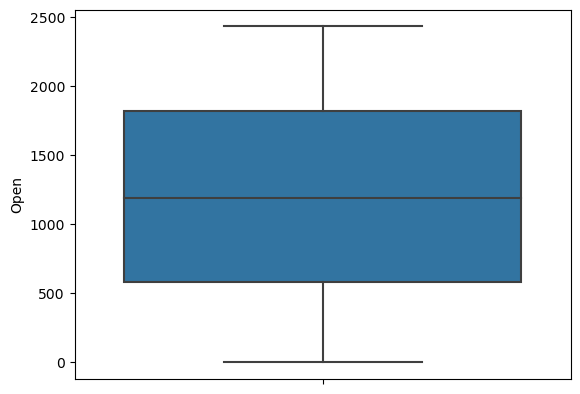

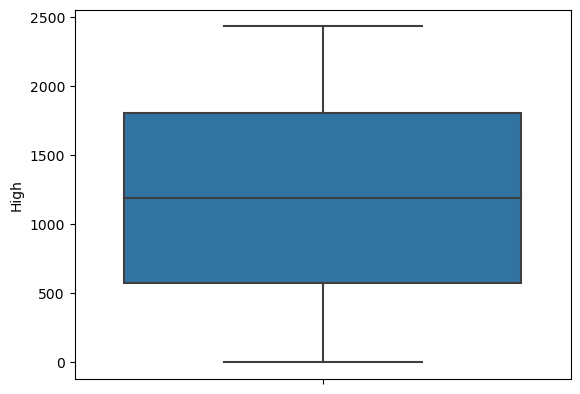

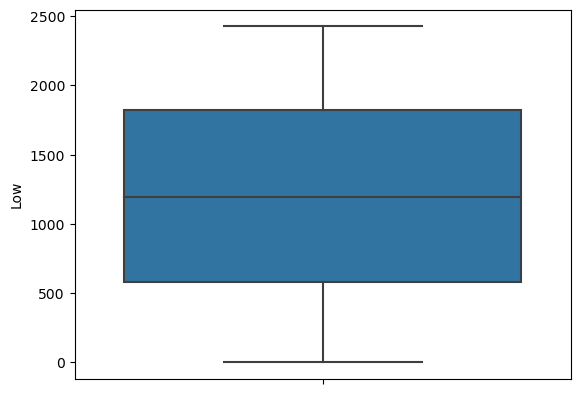

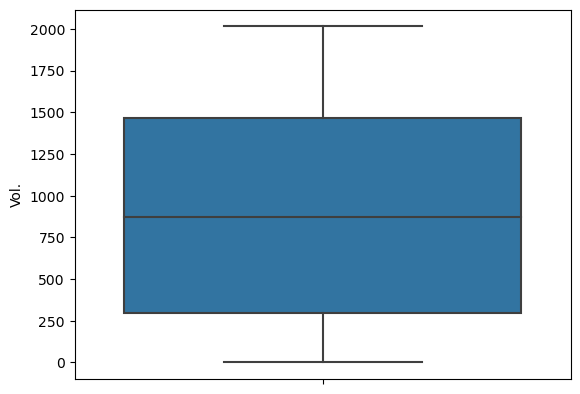

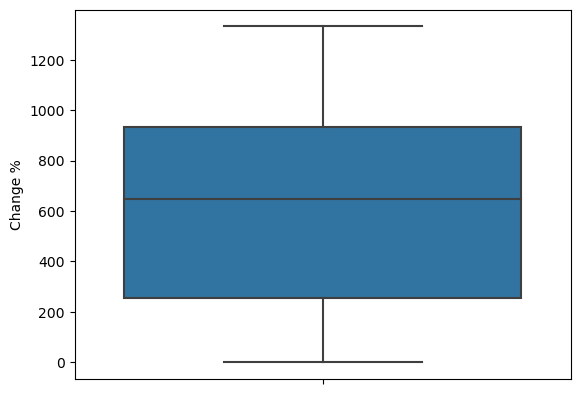

In [13]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot( y =data[i])
        plt.show()

## No outliers present.

### Checking the correlation with the target 'Price' Correlation Using Heatmap


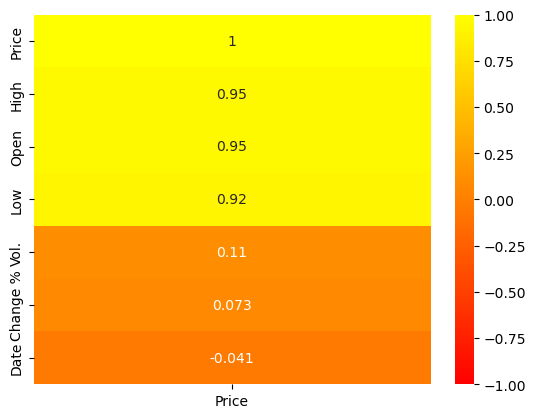

In [14]:
sns.heatmap(data.corr()[["Price"]].sort_values(by="Price",ascending=False), vmin=-1, vmax=1, annot=True, cmap="autumn");

## Lets take only with good correlation with target

### Then i take Engine and date values in x and price values in y for prediction purpose


In [15]:
x=data[['Low','Open','High']].values
y=data[['Price']].values

## Feature Scaling

### Then i take MinMaxScaler for scalling and then i done cross validation to find out the best model

rs =StandardScaler()

In [16]:
sc= StandardScaler()

In [17]:
x=sc.fit_transform(x)

## splitting the data into training and testing set

In [18]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [19]:
models={
    "linearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "Lasso":Lasso(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "BaggingRegressor":BaggingRegressor(),
    "HistgradientBoostingRegressor":HistGradientBoostingRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0)
}

In [20]:
for name,model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score=model.score(x_train, y_train)*100
    testing_score=model.score(x_test, y_test)*100
    score= r2_score(y_test, model.predict(x_test))*100
    mae=mean_absolute_error(y_test, model.predict(x_test))
    mse=mean_squared_error(y_test, model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2score:",score)
    print("training_score:",training_score)
    print("testing_score:",testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse_test:",rmse)
    print("*"*200)

model trained with linearRegression
r2score: 93.64938370392858
training_score: 94.13173550411584
testing_score: 93.64938370392858
mae: 56.672559731601204
mse: 32182.10643350711
rmse_test: 179.3937190469809
********************************************************************************************************************************************************************************************************
model trained with Ridge
r2score: 93.65357192879972
training_score: 94.13167995733622
testing_score: 93.65357192879972
mae: 56.671058710784145
mse: 32160.88236763902
rmse_test: 179.33455430462647
********************************************************************************************************************************************************************************************************
model trained with LinearSVR
r2score: 93.71150048415564
training_score: 93.7175429284757
testing_score: 93.71150048415564
mae: 64.84355212485393
mse: 31867.32614457506
rmse_test: 178.5142183260903

## Model Building

In [21]:
model=LinearSVR()

## Model Fiiting

In [22]:
model.fit(x_train, y_train)

LinearSVR()

In [23]:
training_score=model.score(x_train, y_train)*100
testing_score=model.score(x_test, y_test)*100
score= r2_score(y_test, model.predict(x_test))*100
mae=mean_absolute_error(y_test, model.predict(x_test))
mse=mean_squared_error(y_test, model.predict(x_test))
rmse=np.sqrt(mse)

In [24]:
training_score

93.72002552831982

In [25]:
testing_score

93.71403530529393

In [26]:
score

93.71403530529393

In [27]:
mse

31854.48079542165

In [28]:
rmse

178.47823619540185

In [29]:
y_pred= model.predict(x)
y_pred

array([221.49009837, 221.99927454, 226.38167469, ..., 563.80687065,
       510.11126173, 488.81476205])

### After predicting the y value i decided to compare it with actual value

In [30]:
OUTPUT=pd.DataFrame(zip(y,y_pred), columns=("ACTUAL","PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,226.0,221.490098
1,233.0,221.999275
2,236.0,226.381675
3,234.0,229.372736
4,239.0,227.082480
...,...,...
2550,583.0,693.121122
2551,787.0,657.410039
2552,602.0,563.806871
2553,534.0,510.111262


### Then I plott the Actual value vs predicted value with the help of sctterplot

### VISUALISING THE OUTPUT

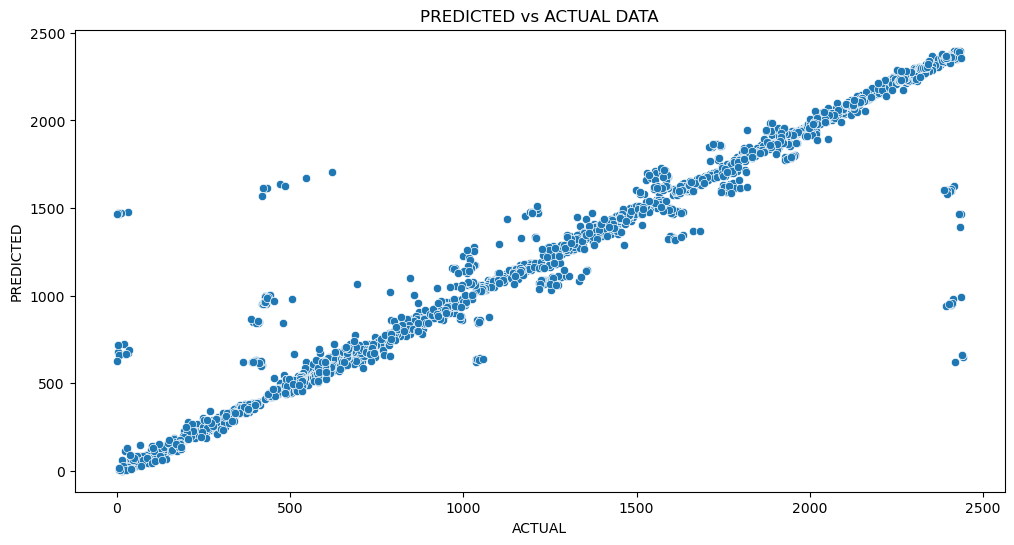

In [31]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED vs ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTED");

## CONCLUSION
### There is a high correlation, exists in the dataset, the price is correlated with other factores in the dataset.